In [1]:
#importy konieczne do lab5
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model as linm
from sklearn.model_selection import train_test_split

In [2]:
#wczytanie zbiorów treningowych - diabetes i boston
diabetes = datasets.load_diabetes()
boston = datasets.load_boston()

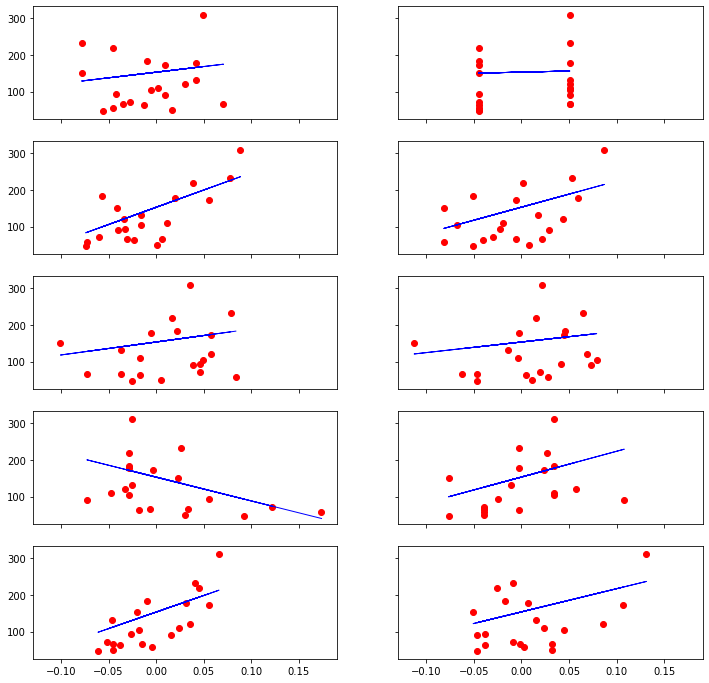

In [3]:
#wizualizacja prostych regresji obliczonych dla zmiennych ze zbioru diabetes
f, axarr = plt.subplots(5,2, sharex=True, sharey=True,figsize=(12,12))
for i in range(0,5):
    for j in range(0,2):
        diabetes_X = diabetes.data[:, np.newaxis, i*2+j]
        
        # Podział na zestawy testowe
        diabetes_X_train = diabetes_X[:-20]
        diabetes_X_test = diabetes_X[-20:]
        
        # Podział na zestawy testowe
        diabetes_y_train = diabetes.target[:-20]
        diabetes_y_test = diabetes.target[-20:]
        
        # Tworzenie obiektu regresji liniowej
        regr = linm.LinearRegression()
        
        # Szkolenie modelu na podstawie utworzonych zestawów
        regr.fit(diabetes_X_train, diabetes_y_train)
        
        # Wyrysowanie wyjścia
        axarr[i,j].scatter(diabetes_X_test, diabetes_y_test,  color='red')
        axarr[i,j].plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue', linewidth=1)
        
plt.show()

In [4]:

diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_Y = diabetes.target
diabetes_X_train = diabetes_X[:-50]
diabetes_X_test = diabetes_X[-50:]
diabetes_y_train = diabetes_Y[:-50]
diabetes_y_test = diabetes_Y[-50:]

In [5]:
#porównanie różnych typów regresji - LinearRegression, Ridge, Lasso, ElasticNet. 
regressors = {}
regressors['LinReg'] =linm.LinearRegression()
regressors['Ridge'] = linm.Ridge(alpha = .5)
regressors['Lasso'] = linm.Lasso(alpha = 5.1)
regressors['ElNet'] =linm.ElasticNet(alpha = .5, l1_ratio=0.5)
fit_results={}
#pętla dla każdego typu obliczająca błąd z umieszczeniem go w zmiennej fit_results.
for key in regressors:
    regr = regressors[key]
    regr.fit(diabetes_X_train, diabetes_y_train)
    mse = np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)
    w = regr.coef_
    wl1 = np.sum(np.abs(w))
    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key]= { 'mse': mse, 'wl2': wl2, 'wl1': wl1, 'w': w}
    print("{}\n----------\n  mse={}\n  wl1={}\n  wl2={}\n  w={}\n ".format(key,mse,wl1,wl2,w))

LinReg
----------
  mse=1789.5698810318208
  wl1=3260.703769182654
  wl2=1274.171756925127
  w=[   1.19680495 -233.50366519  519.88450429  304.48097981 -726.44619916
  415.80697199   83.01061117  203.1648289   667.92936385  105.27983988]
 
Ridge
----------
  mse=2384.1858647392587
  wl1=1511.0823340013712
  wl2=589.1449165292609
  w=[  23.62740295 -119.32265523  362.44657362  222.30799722  -11.56467397
  -45.46192157 -169.43933329  129.82831679  292.72970213  134.35375724]
 
Lasso
----------
  mse=5912.974117294878
  wl1=0.0
  wl2=0.0
  w=[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
 
ElNet
----------
  mse=5781.123148775016
  wl1=39.063433331886635
  wl2=14.336395063161204
  w=[ 1.48801264  0.          7.23427291  4.94114391  2.19772301  1.7139797
 -4.52179996  5.31415092  6.88097675  4.77137353]
 


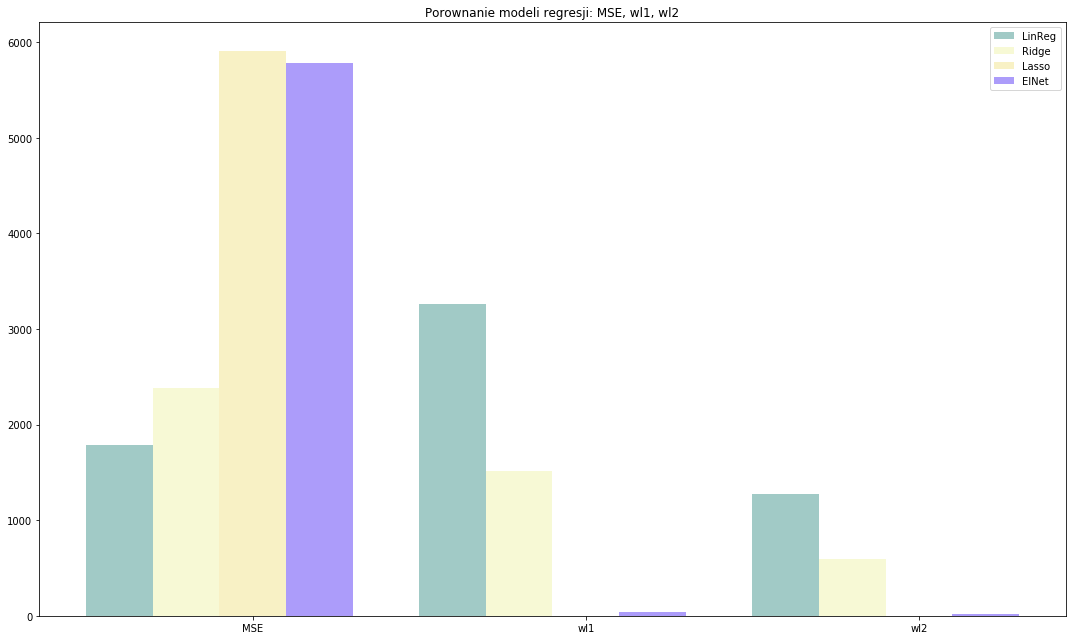

In [6]:
#diagram dokonujący porównania: MSE – błąd dopasowania (mean square error), wl1 – wartość normy l1 wektora w, wl2 – wartość normy l2 wektora w
groups = 3
index = np.arange(groups)
bar_width = .2
opacity = 0.4
fig, ax = plt.subplots(figsize=(15,9))
t=0
for key in regressors:
    results = fit_results[key]
    res_val = (results['mse'],results['wl1'],results['wl2'])
    plt.bar(index+ bar_width*t, res_val, bar_width,
                 alpha=opacity,
                 color=np.random.rand(1,3),
                 label=key)
    t+=1
plt.title('Porownanie modeli regresji: MSE, wl1, wl2')
plt.xticks(index + (t-2)*bar_width, ('MSE', 'wl1', 'wl2'))
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

In [8]:
malzenstwa = pd.read_csv('malzenstwa.csv', sep=';', encoding='iso-8859-1')

In [9]:
ludnosc = malzenstwa.ludnosc
malzenstwa_count = malzenstwa.malzenstwa

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(ludnosc, malzenstwa_count, test_size=0.33)


In [11]:
regr = linm.LinearRegression()
regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

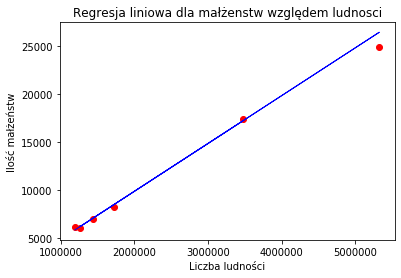

In [12]:
plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa dla małżenstw względem ludnosci')
plt.xlabel('Liczba ludności')
plt.ylabel('Ilość małżeństw')
plt.show()

In [13]:
random_array = np.random.uniform(0,1, size=(2, 100))

In [14]:

print('Średnie dla x oraz y')
x_srednia = random_array[0,:].mean()
print(x_srednia)
y_srednia = random_array[1,:].mean()
print(y_srednia)

Średnie dla x oraz y
0.4912495430887562
0.5479467900543163


In [15]:
print('Odjęte wartości średnich od x oraz y')
x_minus_x_srednia = np.array([x - x_srednia for x in random_array[0,:]])
y_minus_y_srednia = np.array([y - y_srednia for y in random_array[1,:]])

Odjęte wartości średnich od x oraz y


In [16]:
print('Kwadrat powyższych wartości')
x_minus_x_srednia_square = np.square(x_minus_x_srednia)
y_minus_y_srednia_square = np.square(y_minus_y_srednia)

Kwadrat powyższych wartości


In [17]:
product = x_minus_x_srednia_square * y_minus_y_srednia_square

In [18]:
result_df = pd.DataFrame(data = {'x' : random_array[0,:], 'y' : random_array[1, :], 'x-x_srednia': x_minus_x_srednia, 
                                 'y-y_srednia': y_minus_y_srednia, '(x-x_srednia)^2': x_minus_x_srednia_square,'(y-y_srednia)^2': y_minus_y_srednia_square,
                                  '(x-x_srednia) * (y-y_srednia)' : product})

In [19]:
print(x_srednia)
print(y_srednia)
result_df

0.4912495430887562
0.5479467900543163


x         y  x-x_srednia  y-y_srednia  (x-x_srednia)^2  \
0   0.908894  0.168461     0.417644    -0.379486         0.174427   
1   0.994680  0.819001     0.503430     0.271054         0.253442   
2   0.722857  0.274314     0.231607    -0.273633         0.053642   
3   0.065531  0.517138    -0.425718    -0.030809         0.181236   
4   0.781519  0.432245     0.290269    -0.115702         0.084256   
..       ...       ...          ...          ...              ...   
95  0.214752  0.713567    -0.276498     0.165621         0.076451   
96  0.589571  0.468563     0.098321    -0.079383         0.009667   
97  0.070550  0.935267    -0.420700     0.387320         0.176988   
98  0.570966  0.739422     0.079717     0.191475         0.006355   
99  0.545267  0.472829     0.054018    -0.075118         0.002918   

    (y-y_srednia)^2  (x-x_srednia) * (y-y_srednia)  
0          0.144009                       0.025119  
1          0.073470                       0.018620  
2          0.074875                       0.004016  
3          0.000949                       0.000172  
4          0.013387                       0.001128  
..              ...                            ...  
95         0.027430                       0.002097  
96         0.006302                       0.000061  
97         0.150017                       0.026551  
98         0.036663                       0.000233  
99         0.005643                       0.000016  

[100 rows x 7 columns]

In [20]:
a = result_df['(x-x_srednia) * (y-y_srednia)'].sum() / result_df['(x-x_srednia)^2'].sum()

In [21]:
b = y_srednia - a * x_srednia

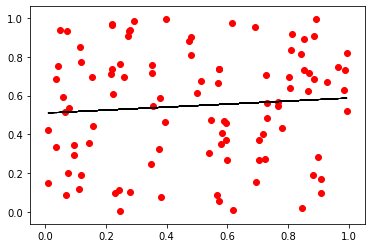

In [22]:
plt.scatter(random_array[0,:], random_array[1,:],  color='red')
plt.plot(random_array[0,:], a * random_array[0,:] + b, color='black', linewidth=1)
plt.show()

In [23]:
data = {'Dochody':[210,
270,
290,
310,
370,
400,
450,
480,
510,
520], 'Wydatki':[140,
190,
250,
270,
290,
310,
340,
360,
420,
390]}

In [24]:
df = pd.DataFrame(data)

In [25]:
dochody = df.Dochody
wydatki = df.Wydatki

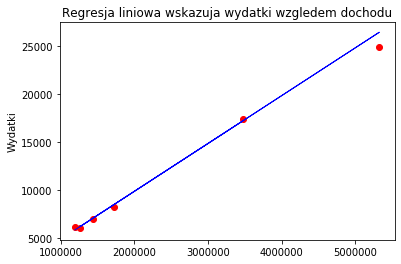

In [26]:
regr = linm.LinearRegression()

regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))
        
plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa wskazuja wydatki wzgledem dochodu')
plt.ylabel('Wydatki')
plt.show()